# Testing the Gustavo's code

In [1]:
pip list


Package                            Version  
---------------------------------- ---------
alabaster                          0.7.12   
anaconda-client                    1.7.2    
anaconda-navigator                 1.9.7    
anaconda-project                   0.8.3    
APLpy                              2.0.3    
app                                0.0.1    
asn1crypto                         1.0.1    
asteval                            0.9.19   
astroid                            2.3.1    
astropy                            4.0      
astropy-healpix                    0.5      
astroquery                         0.4.1    
atomicwrites                       1.3.0    
ATpy                               0.9.7    
attrs                              19.2.0   
Babel                              2.7.0    
backcall                           0.1.0    
backports.functools-lru-cache      1.5      
backports.os                       0.1.1    
backports.shutil-get-terminal-size 1.0.0    
backports.

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import glob
import json
from pathlib import Path
import matplotlib.pyplot as plt
import splusdata as sp
import seaborn as sn
import pandas as pd
sn.set_context("poster")

In [4]:
ROOT_PATH = Path("..")  # necessary since we are in the sub-folder

In [5]:
sp.get_surveys()

['main3.1', 'main3.2', 'main3.3', 'main3.4', 'main3.5', 'main3.6', 'main3.7', 'main3.8', 'stripe82']


In [6]:
sp.get_columns()

input password: idr3splus


['index',
 'Field',
 'ID',
 'RA',
 'DEC',
 'X',
 'Y',
 'ISOarea',
 'MU_MAX',
 'A',
 'B',
 'THETA',
 'ELONGATION',
 'ELLIPTICITY',
 'FLUX_RADIUS',
 'KRON_RADIUS',
 'PhotoFlagDet',
 'CLASS_STAR',
 'FWHM',
 'FWHM_n',
 's2nDet',
 'PhotoFlag_U',
 'CLASS_STAR_U',
 'FWHM_U',
 'PhotoFlag_F378',
 'CLASS_STAR_F378',
 'FWHM_F378',
 'PhotoFlag_F395',
 'CLASS_STAR_F395',
 'FWHM_F395',
 'PhotoFlag_F410',
 'CLASS_STAR_F410',
 'FWHM_F410',
 'PhotoFlag_F430',
 'CLASS_STAR_F430',
 'FWHM_F430',
 'PhotoFlag_G',
 'CLASS_STAR_G',
 'FWHM_G',
 'PhotoFlag_F515',
 'CLASS_STAR_F515',
 'FWHM_F515',
 'PhotoFlag_R',
 'CLASS_STAR_R',
 'FWHM_R',
 'PhotoFlag_F660',
 'CLASS_STAR_F660',
 'FWHM_F660',
 'PhotoFlag_I',
 'CLASS_STAR_I',
 'FWHM_I',
 'PhotoFlag_F861',
 'CLASS_STAR_F861',
 'FWHM_F861',
 'PhotoFlag_Z',
 'CLASS_STAR_Z',
 'FWHM_Z',
 'U_auto',
 'e_U_auto',
 's2n_U_auto',
 'F378_auto',
 'e_F378_auto',
 's2n_F378_auto',
 'F395_auto',
 'e_F395_auto',
 's2n_F395_auto',
 'F410_auto',
 'e_F410_auto',
 's2n_F410_auto',
 

# Running Gustavo query

In [7]:
df = sp.queryidr3('main3.1', ['RA > 48.9', 'RA < 49'], columns=['ID', 'RA', 'DEC'])

input password: idr3splus
getting data...

it may take a minute

Done!


In [8]:
df_new = sp.queryidr3('main3.1', conditions = ['(R_PStotal - F660_PStotal) > 0.6', 'I_PStotal - F660_PStotal > 0.6', 'R_PStotal > 0', 'R_PStotal < 23', 'F515_PStotal > 0', 'F515_PStotal < 23', 'F861_PStotal > 0', 'F861_PStotal < 23', 'I_PStotal > 0', 'I_PStotal < 23', 'R_PStotal < 20.5'], columns='all')

input password: idr3splus
getting data...

it may take a minute

Done!


#  Applying color criterion based on synthetic photometry to the data (color diagram inspired on Viironen's paper)

In [9]:
df_1 = sp.queryidr3('main3.1', conditions = ['R_PStotal < 20.5', 'e_R_PStotal < 0.2', 'e_F660_PStotal < 0.2', 'e_I_PStotal < 0.2', '(R_PStotal - F660_PStotal) > 0.15*(R_PStotal - I_PStotal) + 0.53'], columns='all')

input password: idr3splus
getting data...

it may take a minute

Done!


In [10]:
df_2 = sp.queryidr3('main3.2', conditions = ['R_PStotal < 20.5', 'e_R_PStotal < 0.2', 'e_F660_PStotal < 0.2', 'e_I_PStotal < 0.2', '(R_PStotal - F660_PStotal) > 0.15*(R_PStotal - I_PStotal) + 0.53'], columns='all')

input password: idr3splus
getting data...

it may take a minute

Done!


In [11]:
df_3 = sp.queryidr3('main3.3', conditions = ['R_PStotal < 20.5', 'e_R_PStotal < 0.2', 'e_F660_PStotal < 0.2', 'e_I_PStotal < 0.2', '(R_PStotal - F660_PStotal) > 0.15*(R_PStotal - I_PStotal) + 0.53'], columns='all')

input password: idr3splus
getting data...

it may take a minute

Done!


In [12]:
df_4 = sp.queryidr3('main3.4', conditions = ['R_PStotal < 20.5', 'e_R_PStotal < 0.2', 'e_F660_PStotal < 0.2', 'e_I_PStotal < 0.2', '(R_PStotal - F660_PStotal) > 0.15*(R_PStotal - I_PStotal) + 0.53'], columns='all')

input password: idr3splus
getting data...

it may take a minute

Done!


In [13]:
df_5 = sp.queryidr3('main3.5', conditions = ['R_PStotal < 20.5', 'e_R_PStotal < 0.2', 'e_F660_PStotal < 0.2', 'e_I_PStotal < 0.2', '(R_PStotal - F660_PStotal) > 0.15*(R_PStotal - I_PStotal) + 0.53'], columns='all')

input password: idr3splus
getting data...

it may take a minute

Done!


In [14]:
df_6 = sp.queryidr3('main3.6', conditions = ['R_PStotal < 20.5', 'e_R_PStotal < 0.2', 'e_F660_PStotal < 0.2', 'e_I_PStotal < 0.2', '(R_PStotal - F660_PStotal) > 0.15*(R_PStotal - I_PStotal) + 0.53'], columns='all')

input password: idr3splus
getting data...

it may take a minute

Done!


In [15]:
df_7 = sp.queryidr3('main3.7', conditions = ['R_PStotal < 20.5', 'e_R_PStotal < 0.2', 'e_F660_PStotal < 0.2', 'e_I_PStotal < 0.2', '(R_PStotal - F660_PStotal) > 0.15*(R_PStotal - I_PStotal) + 0.53'], columns='all')

input password: idr3splus
getting data...

it may take a minute

Done!


In [16]:
df_8 = sp.queryidr3('main3.8', conditions = ['R_PStotal < 20.5', 'e_R_PStotal < 0.2', 'e_F660_PStotal < 0.2', 'e_I_PStotal < 0.2', '(R_PStotal - F660_PStotal) > 0.15*(R_PStotal - I_PStotal) + 0.53'], columns='all')

input password: idr3splus
getting data...

it may take a minute

Done!


In [21]:
df_1

,index,Field,ID,RA,DEC,X,Y,ISOarea,MU_MAX,A,...,I_PStotal,e_I_PStotal,s2n_I_PStotal,F861_PStotal,e_F861_PStotal,s2n_F861_PStotal,Z_PStotal,e_Z_PStotal,s2n_Z_PStotal,nDet_magPStotal
0,5765,SPLUS-s32s38,iDR3.SPLUS-s32s38.028380,67.173955,-41.225693,1043.5863,6939.4090,74,14.548531,3.527890,...,17.990486,0.015921,67.096380,16.937862,0.015167,70.443370,17.199533,0.014179,75.352980,12.0
1,6552,SPLUS-s32s38,iDR3.SPLUS-s32s38.031174,66.116594,-40.769485,6254.3500,9948.2490,38,16.414532,1.949499,...,19.315859,0.045725,24.108550,19.487434,0.118855,9.227727,19.439081,0.093266,11.759572,12.0
2,7060,SPLUS-s32s38,iDR3.SPLUS-s32s38.033677,66.798827,-40.897673,2877.2930,9101.8110,41,16.295149,2.035230,...,18.855888,0.031114,35.027653,18.598717,0.054873,19.795450,18.613476,0.044946,24.167337,11.0
3,8144,SPLUS-s32s38,iDR3.SPLUS-s32s38.038769,66.767713,-41.033724,3036.3777,8212.1320,36,17.250350,2.104229,...,19.454025,0.050472,21.456057,19.155320,0.087673,12.332643,19.073694,0.066587,16.238163,11.0
4,426,SPLUS-s29s38,iDR3.SPLUS-s29s38.002404,63.697086,-38.155669,1038.2167,1244.3765,47,15.150817,2.225141,...,18.686876,0.024380,44.719666,17.816990,0.026927,40.840538,18.152847,0.027857,39.477123,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,692,SPLUS-s32s38,iDR3.SPLUS-s32s38.003573,65.383941,-42.052357,9800.7630,1529.3279,41,15.322075,1.846223,...,18.673632,0.027288,40.605015,17.521626,0.023504,46.774582,17.875217,0.024508,44.859090,12.0
638,2350,SPLUS-s32s38,iDR3.SPLUS-s32s38.012074,67.189300,-41.794397,1007.6326,3216.0980,370,11.799416,3.239796,...,14.177555,0.001882,570.174500,14.160026,0.003137,342.525570,14.193840,0.002301,466.972380,12.0
639,3139,SPLUS-s32s38,iDR3.SPLUS-s32s38.015814,66.487024,-41.659138,4432.6343,4124.1562,29,17.654068,2.166568,...,20.130650,0.090387,11.983278,20.032848,0.190871,5.678673,19.596375,0.106156,10.210408,12.0
640,3812,SPLUS-s32s38,iDR3.SPLUS-s32s38.019136,66.830174,-41.546293,2749.7346,4855.1930,26,17.341057,1.964910,...,19.630596,0.058450,18.504707,19.339436,0.102831,10.524075,19.616837,0.107601,10.057543,12.0


In [20]:
dfs = [df_1, df_2, df_3, df_4, df_4, df_5, df_6, df_7, df_8]
df_result = pd.concat(dfs)
df_result

,index,Field,ID,RA,DEC,X,Y,ISOarea,MU_MAX,A,...,I_PStotal,e_I_PStotal,s2n_I_PStotal,F861_PStotal,e_F861_PStotal,s2n_F861_PStotal,Z_PStotal,e_Z_PStotal,s2n_Z_PStotal,nDet_magPStotal
0,5765,SPLUS-s32s38,iDR3.SPLUS-s32s38.028380,67.173955,-41.225693,1043.5863,6939.4090,74,14.548531,3.527890,...,17.990486,0.015921,67.096380,16.937862,0.015167,70.443370,17.199533,0.014179,75.352980,12.0
1,6552,SPLUS-s32s38,iDR3.SPLUS-s32s38.031174,66.116594,-40.769485,6254.3500,9948.2490,38,16.414532,1.949499,...,19.315859,0.045725,24.108550,19.487434,0.118855,9.227727,19.439081,0.093266,11.759572,12.0
2,7060,SPLUS-s32s38,iDR3.SPLUS-s32s38.033677,66.798827,-40.897673,2877.2930,9101.8110,41,16.295149,2.035230,...,18.855888,0.031114,35.027653,18.598717,0.054873,19.795450,18.613476,0.044946,24.167337,11.0
3,8144,SPLUS-s32s38,iDR3.SPLUS-s32s38.038769,66.767713,-41.033724,3036.3777,8212.1320,36,17.250350,2.104229,...,19.454025,0.050472,21.456057,19.155320,0.087673,12.332643,19.073694,0.066587,16.238163,11.0
4,426,SPLUS-s29s38,iDR3.SPLUS-s29s38.002404,63.697086,-38.155669,1038.2167,1244.3765,47,15.150817,2.225141,...,18.686876,0.024380,44.719666,17.816990,0.026927,40.840538,18.152847,0.027857,39.477123,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,3983,SPLUS-n05n50,iDR3.SPLUS-n05n50.013330,216.699447,4.993994,6264.8670,2653.9270,21,15.122646,1.396180,...,18.614079,0.026827,40.179382,18.161686,0.032507,33.298250,17.943100,0.022272,48.599518,11.0
366,4111,SPLUS-n05n50,iDR3.SPLUS-n05n50.013658,216.890811,5.001337,5017.0290,2701.9531,26,14.427943,1.387669,...,18.021282,0.017250,62.504060,17.702763,0.022892,47.317013,17.680550,0.018060,59.978760,12.0
367,15009,SPLUS-n05n50,iDR3.SPLUS-n05n50.045856,216.101245,5.673599,10160.6045,7105.1260,45,15.898336,3.017411,...,18.978344,0.036518,30.239697,18.467316,0.041729,26.118713,18.399250,0.032670,33.360676,10.0
368,18144,SPLUS-n05n50,iDR3.SPLUS-n05n50.056072,217.100823,5.873065,3650.2607,8408.3610,42,16.508059,2.029807,...,19.240334,0.044714,24.340906,18.980572,0.063769,17.027576,18.921478,0.051008,21.287540,12.0


In [22]:
#Colours
x_color = df_result["R_PStotal"] - df_result["I_PStotal"]
y_color = df_result["R_PStotal"] - df_result["F660_PStotal"]

In [23]:
#Criterion
x = np.linspace(-15.0, 15.0, 2000)
y = 0.15*x + 0.53

No handles with labels found to put in legend.


Text(-2.3, 0.19, '$0.15*(r - i) + 0.53$')

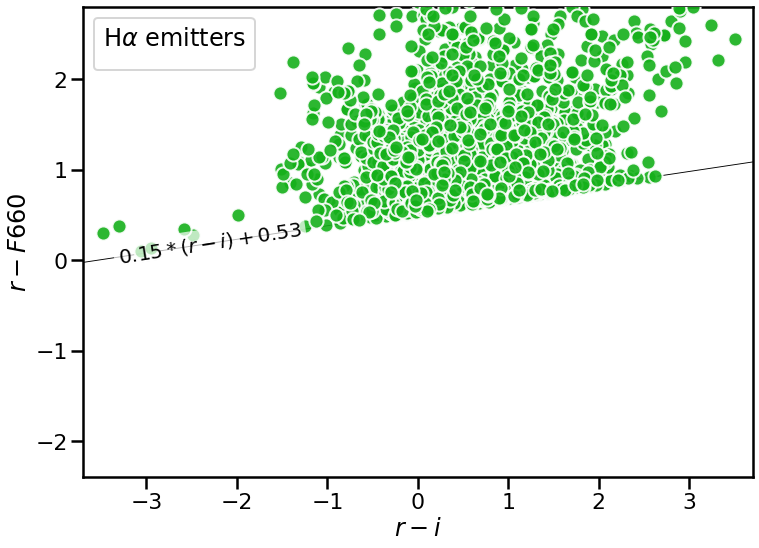

In [33]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.legend(ncol=2).set_title(r"H$\alpha$ emitters")
ax.set(xlim=[-3.7, 3.7], ylim=[-2.4, 2.8])
ax.set_aspect("equal")
ax.set(xlabel=r"$r - i$", ylabel=r"$r - F660$")
ax.scatter(x_color, y_color,  c=sn.xkcd_rgb['green'], 
                  alpha=0.9, marker='o', s=200, zorder=3, edgecolor='w', cmap="Blues")
ax.plot(x, y, c="k", lw=0.9)
textbb = {"facecolor": "white", "alpha": 0.7, "edgecolor": "none"}
textpars = {'ha': 'center', 'va': 'center', 'bbox': textbb, 'fontsize': 'small'}
ax.text(-2.3, 0.19, r'$0.15*(r - i) + 0.53$', rotation=8.8, rotation_mode='anchor', **textpars)

In [34]:
##save into FITS table
from astropy.table import Table
Table.from_pandas(df_result).write('../DR3-SPLUS/halphaemitter-allmain.fits', format='fits', overwrite=True)

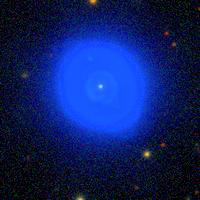

In [36]:
# RGB imga of a known PNe
sp.get_img_obj(Field='SPLUS-n15s05', ID='iDR3.SPLUS-n15s05.030347')